# Many weakly-relevant predictors  

In [1]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pymc_bart as pmb
from fixed_r2 import fixed_R2
from vi_evi import vi_evi

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
RANDOM_SEED = 8457
rng = np.random.RandomState(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

## N-Dimensional Gaussian  

In [3]:
n = 100
p = 10

In [4]:
data, betas = fixed_R2(n, p, sigma=1, R2=0.5, rho=0.1)

In [5]:
Y = data.pop("y")
X = data

In [6]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,0.218572,-0.300150,-0.027961,0.285971,0.022916,0.310681,-0.228515,-0.055359,0.365936,-0.174546
1,-0.399393,-0.146868,-0.025747,0.117931,0.079574,-0.348478,-0.043696,0.688958,-0.234975,-0.019226
2,0.310799,0.289992,0.218791,-0.329806,-0.843116,-0.015796,0.231994,-0.462814,0.211510,-0.146594
3,-0.082597,-0.300522,0.145624,-0.081904,-0.116435,0.295989,-0.457990,0.680331,0.113673,-0.078522
4,0.154843,0.055392,-0.027070,0.447388,-0.290712,-0.150927,0.210020,-0.196147,0.141490,-0.388176


In [7]:
Y[:10]

0   -0.018856
1    0.629825
2    0.909430
3    1.963242
4    0.562829
5    0.041856
6   -1.450595
7   -0.382597
8   -0.858726
9    0.840286
Name: y, dtype: float64

In [8]:
with pm.Model() as model:
    μ = pmb.BART("μ", X, Y, m=50)
    σ = pm.HalfNormal("σ", 1)
    y = pm.Normal("y", μ, σ, observed=Y)
    idata = pm.sample(
        chains=4, compute_convergence_checks=False, random_seed=RANDOM_SEED
    )

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 74 seconds.


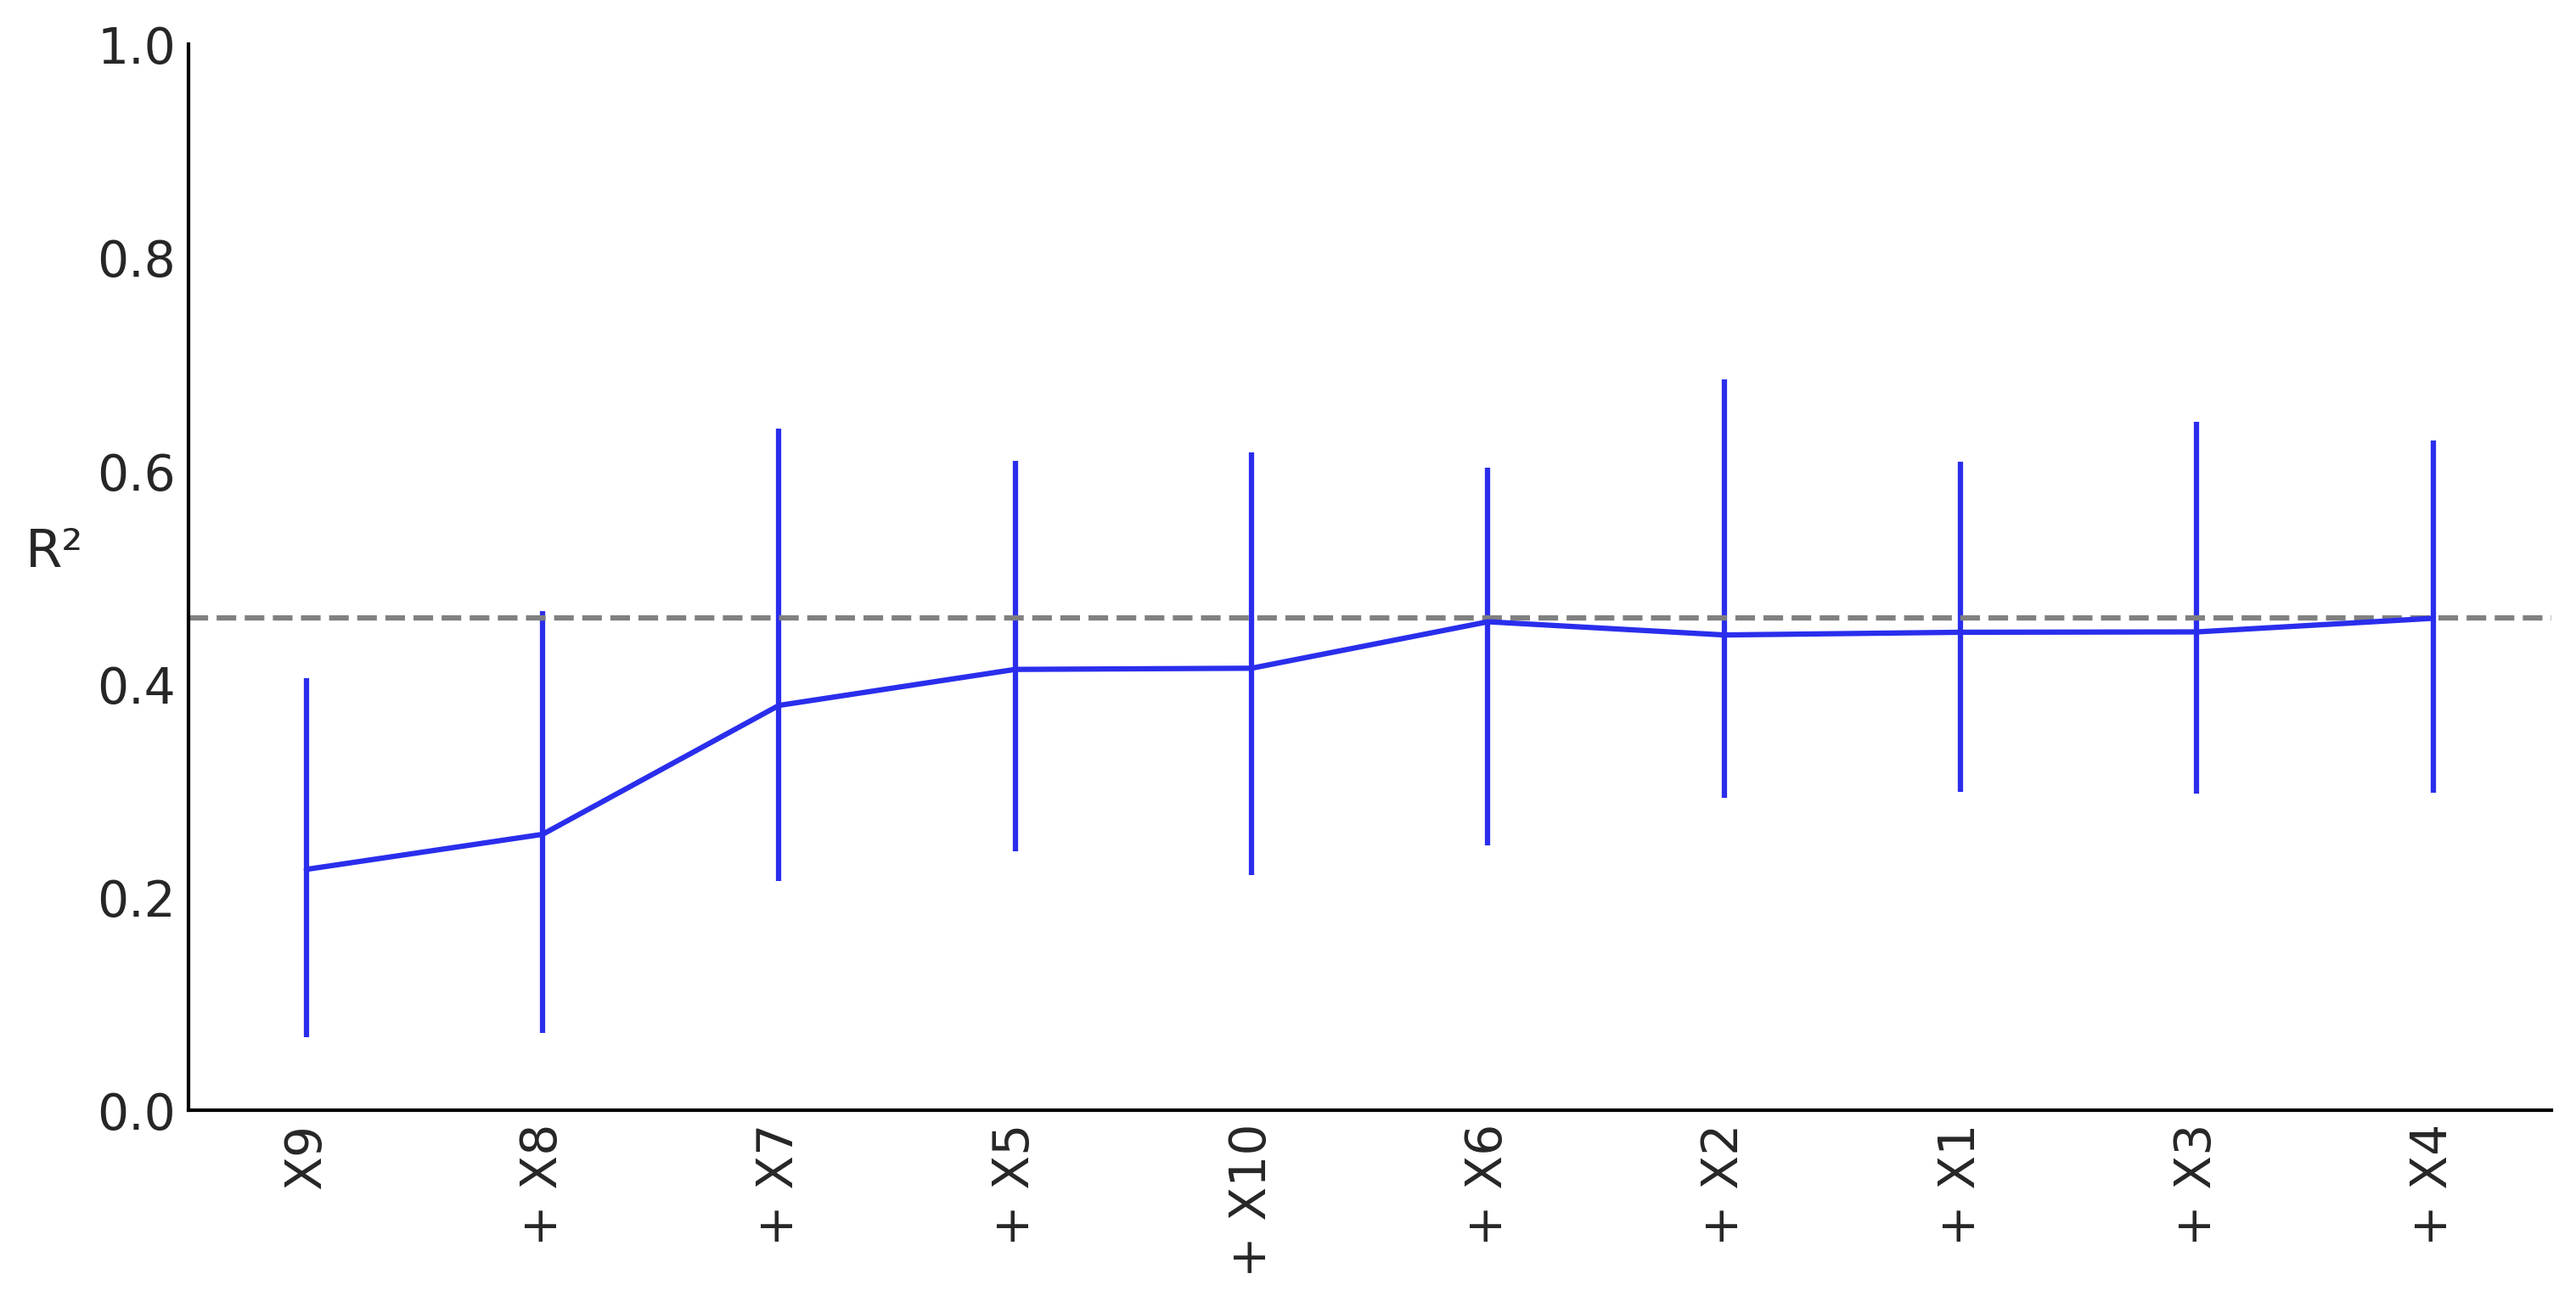

In [9]:
indices_vi, _ = pmb.utils.plot_variable_importance(
    idata, μ, X, method="VI", xlabel_angle=90, figsize=(10, 5)
);

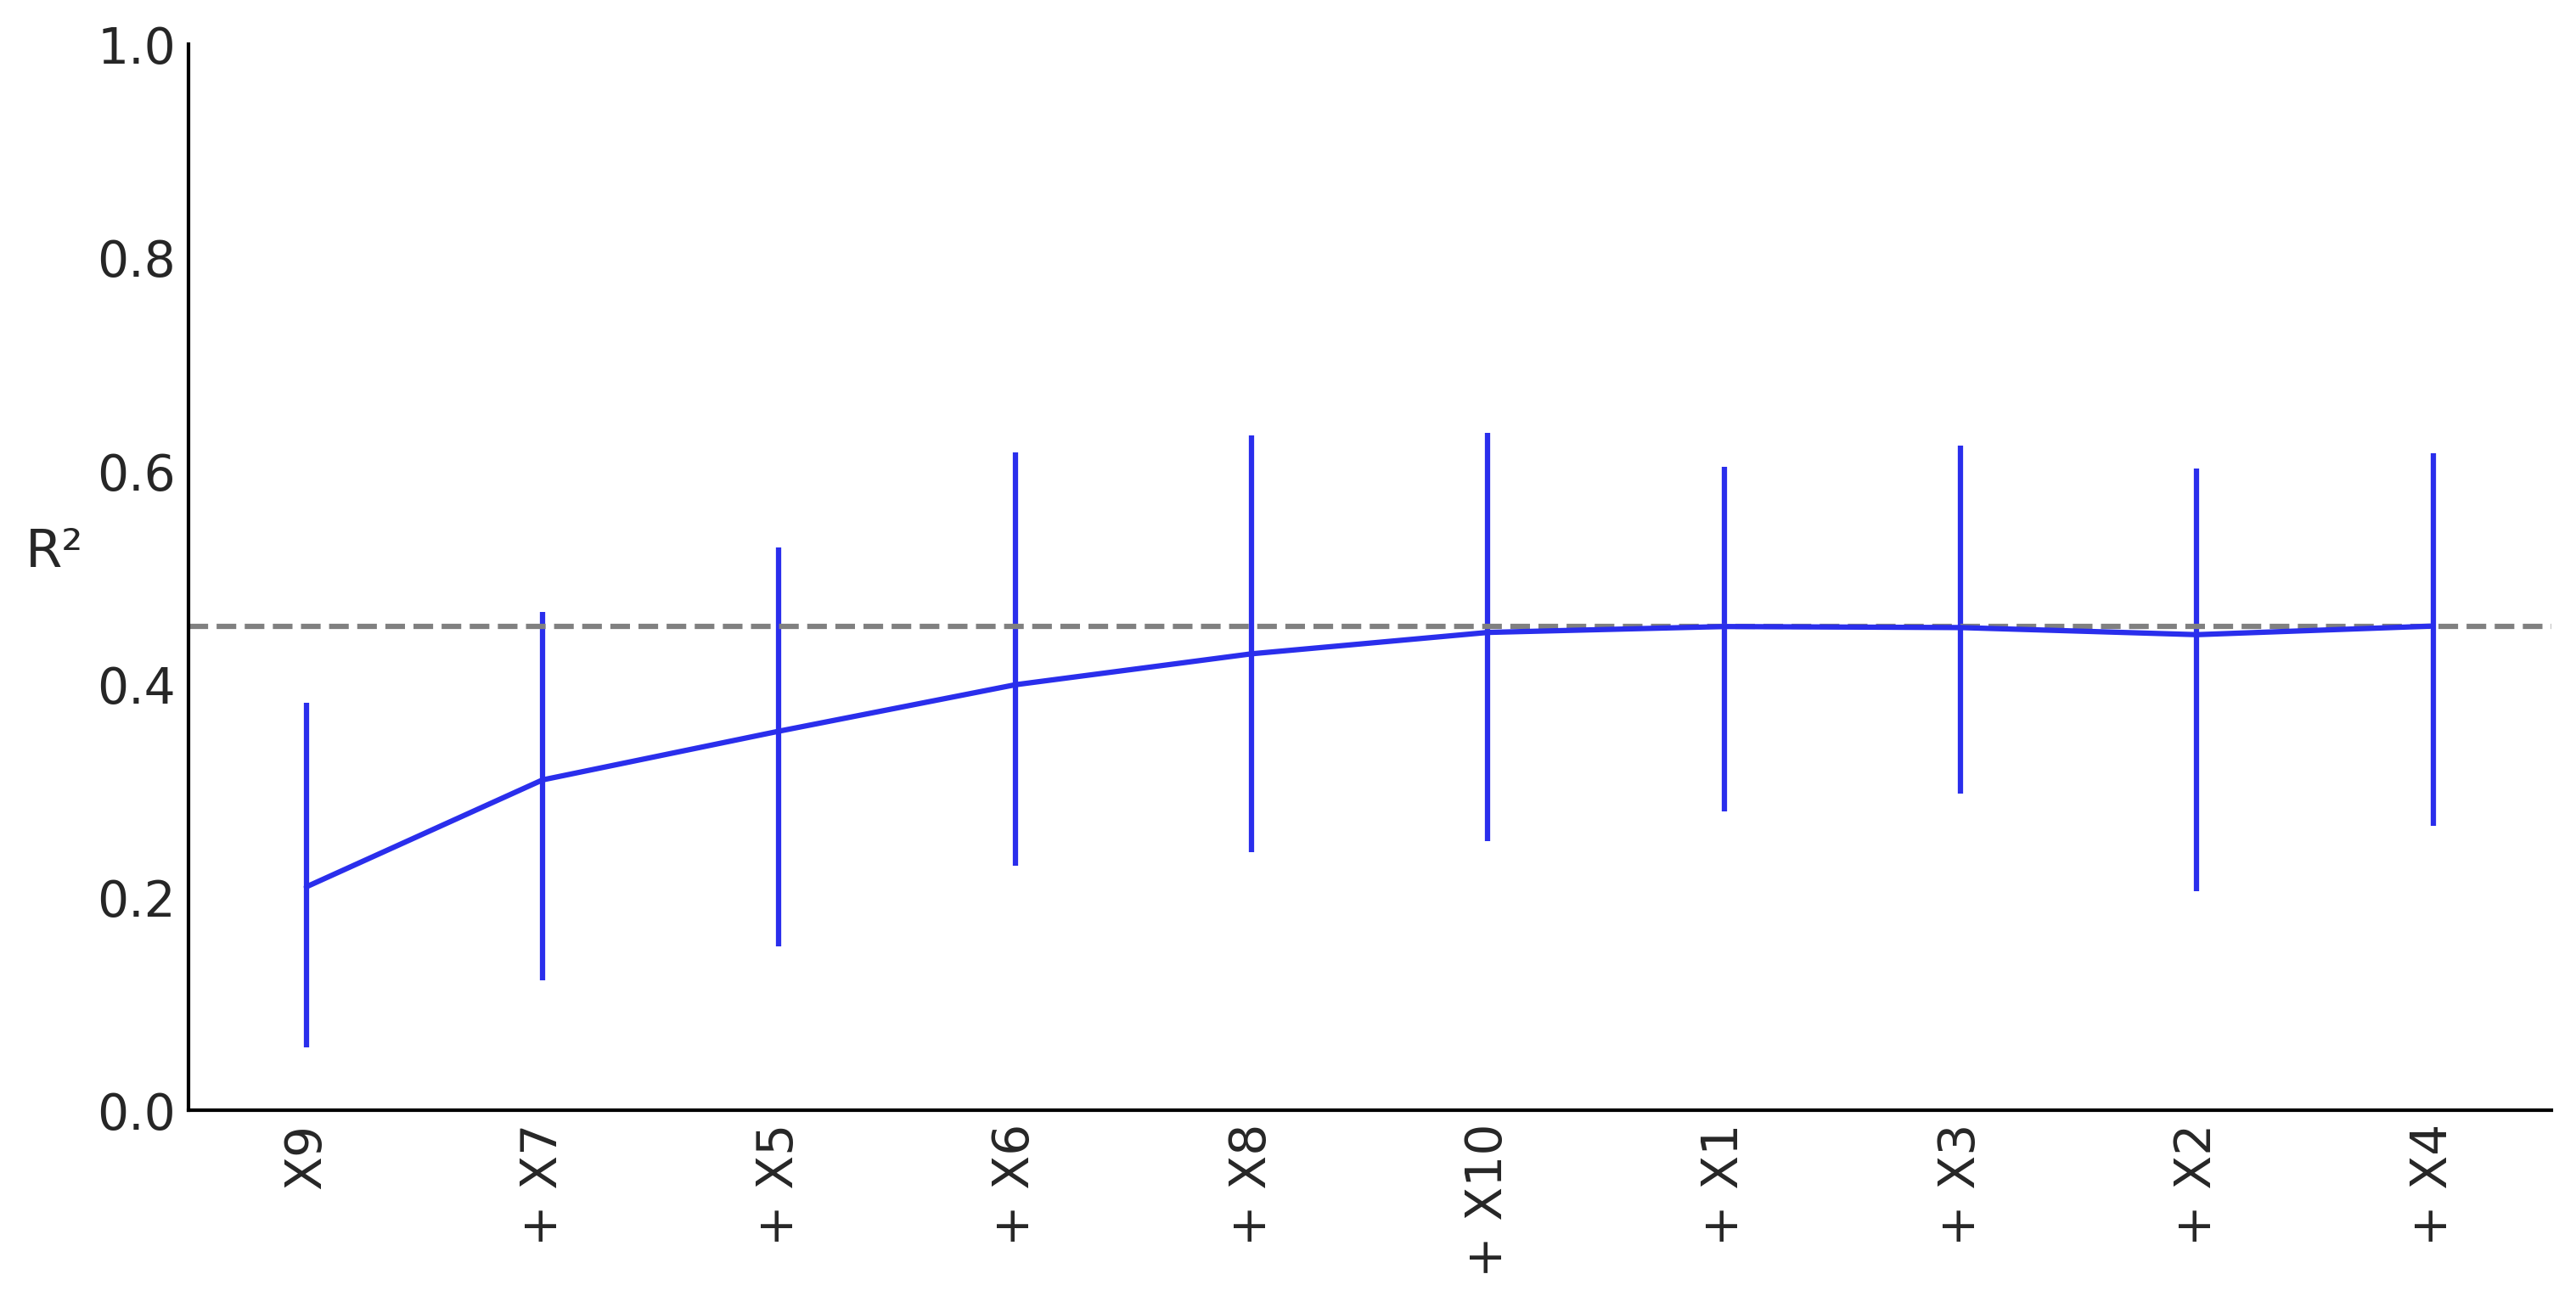

In [10]:
indices_bw, _ = pmb.utils.plot_variable_importance(
    idata, μ, X, method="backward", xlabel_angle=90, figsize=(10, 5)
);

## Explicit computation of R² following method="VI" order, with m=50

In [11]:
idatas = []
bart_rvs = []

for idx in range(X.shape[1]):
    with pm.Model() as model:
        μ = pmb.BART("μ", X.iloc[:, indices_vi[: idx + 1]], Y, m=50)
        σ = pm.HalfNormal("σ", 1)
        y = pm.Normal("y", μ, σ, observed=Y)
        idata = pm.sample(
            chains=4, compute_convergence_checks=False, random_seed=RANDOM_SEED
        )
        idatas.append(idata)
        bart_rvs.append(μ)

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 75 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 74 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 76 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 75 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 76 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 75 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 74 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 76 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 75 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 77 seconds.


In [12]:
X.iloc[:, indices_vi[: X.shape[1] + 1]]

,X9,X8,X7,X5,X10,X6,X2,X1,X3,X4
0,0.365936,-0.055359,-0.228515,0.022916,-0.174546,0.310681,-0.300150,0.218572,-0.027961,0.285971
1,-0.234975,0.688958,-0.043696,0.079574,-0.019226,-0.348478,-0.146868,-0.399393,-0.025747,0.117931
2,0.211510,-0.462814,0.231994,-0.843116,-0.146594,-0.015796,0.289992,0.310799,0.218791,-0.329806
3,0.113673,0.680331,-0.457990,-0.116435,-0.078522,0.295989,-0.300522,-0.082597,0.145624,-0.081904
4,0.141490,-0.196147,0.210020,-0.290712,-0.388176,-0.150927,0.055392,0.154843,-0.027070,0.447388
...,...,...,...,...,...,...,...,...,...,...
95,-0.257492,0.402467,-0.113321,-0.117330,-0.625184,-0.332301,-0.399302,0.409219,0.195749,0.614470
96,0.137862,-0.027238,0.084235,-0.500439,-0.083445,0.378028,0.096148,0.017385,0.051983,-0.228822
97,-0.087613,0.093070,-0.172781,0.017369,0.121852,-0.269015,0.420457,-0.349370,-0.379163,-0.298698
98,0.460156,-0.385569,0.059614,0.192828,-0.154302,-0.211828,-0.148056,-0.169432,-0.459274,-0.431589


We now check that computing the predictions estimated by pruning the trees is close to the predictions if we actually ommits covariables and refit models.

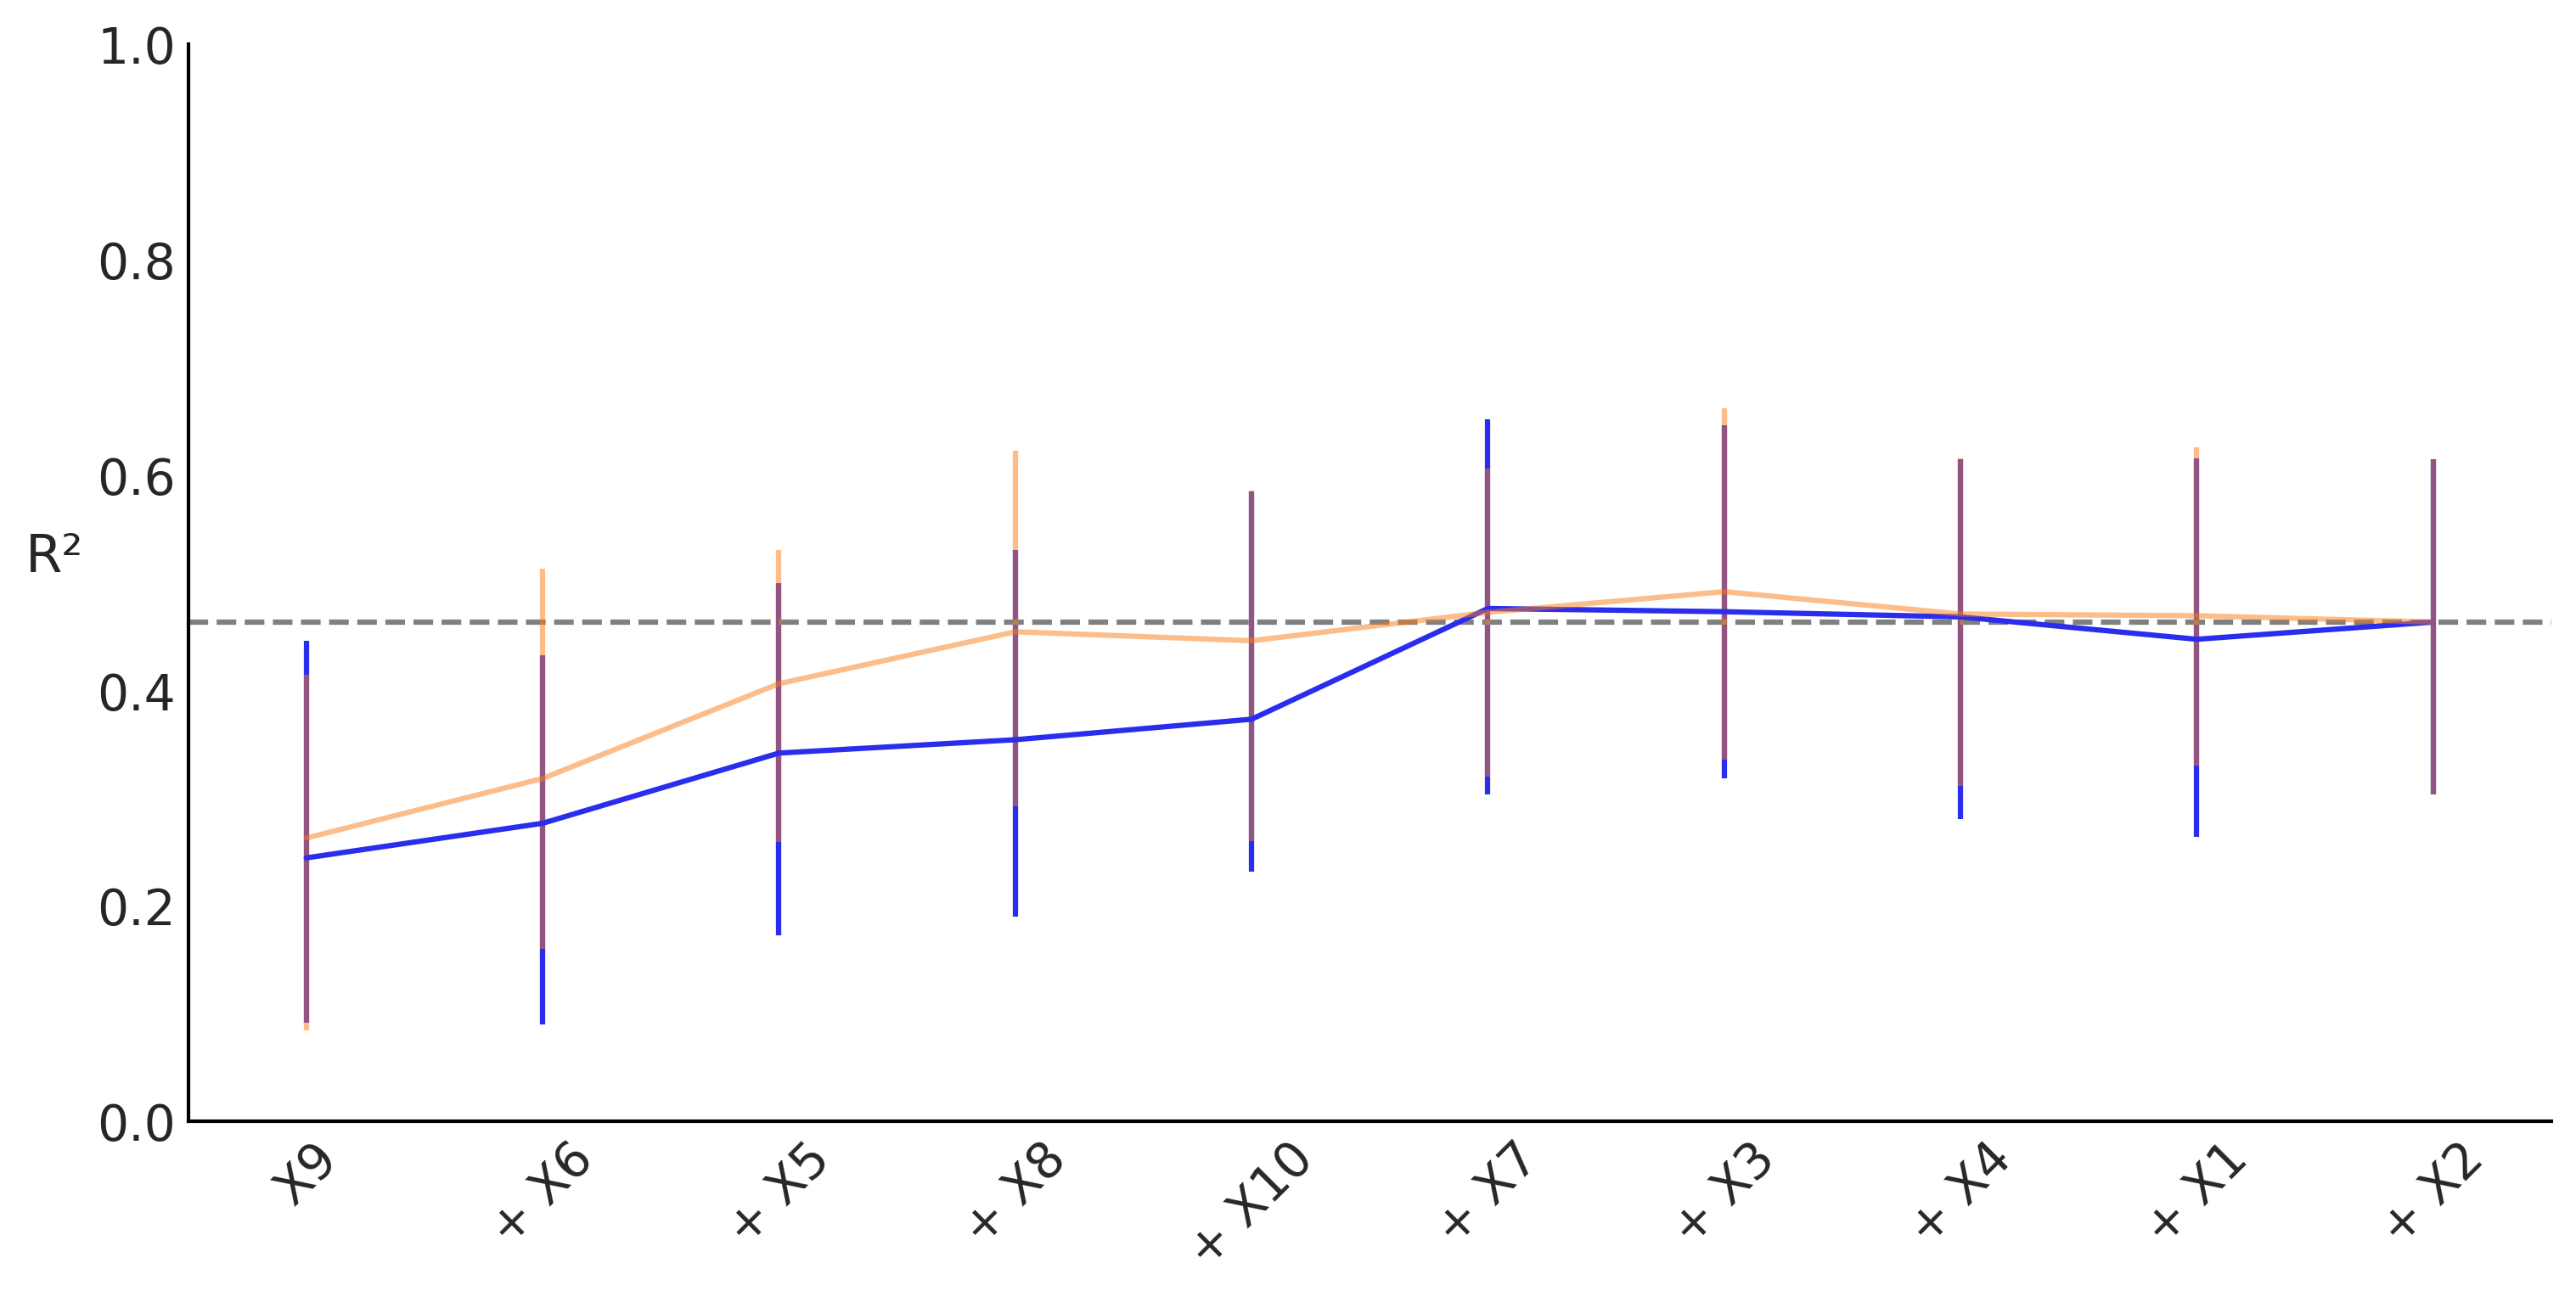

In [13]:
vi_evi(bart_rvs, idatas, X, indices_vi, "VI", 100, RANDOM_SEED, figsize=(10, 5))
plt.savefig("weak-pred_m50_vi.png");

## Explicit computation of R² following method="backward" order, with m=50

In [14]:
idatas = []
bart_rvs = []

for idx in range(X.shape[1]):
    with pm.Model() as model:
        μ = pmb.BART("μ", X.iloc[:, indices_bw[: idx + 1]], Y, m=50)
        σ = pm.HalfNormal("σ", 1)
        y = pm.Normal("y", μ, σ, observed=Y)
        idata = pm.sample(
            chains=4, compute_convergence_checks=False, random_seed=RANDOM_SEED
        )
        idatas.append(idata)
        bart_rvs.append(μ)

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 76 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 75 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 75 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 74 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 75 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 75 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 74 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 74 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 75 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 75 seconds.


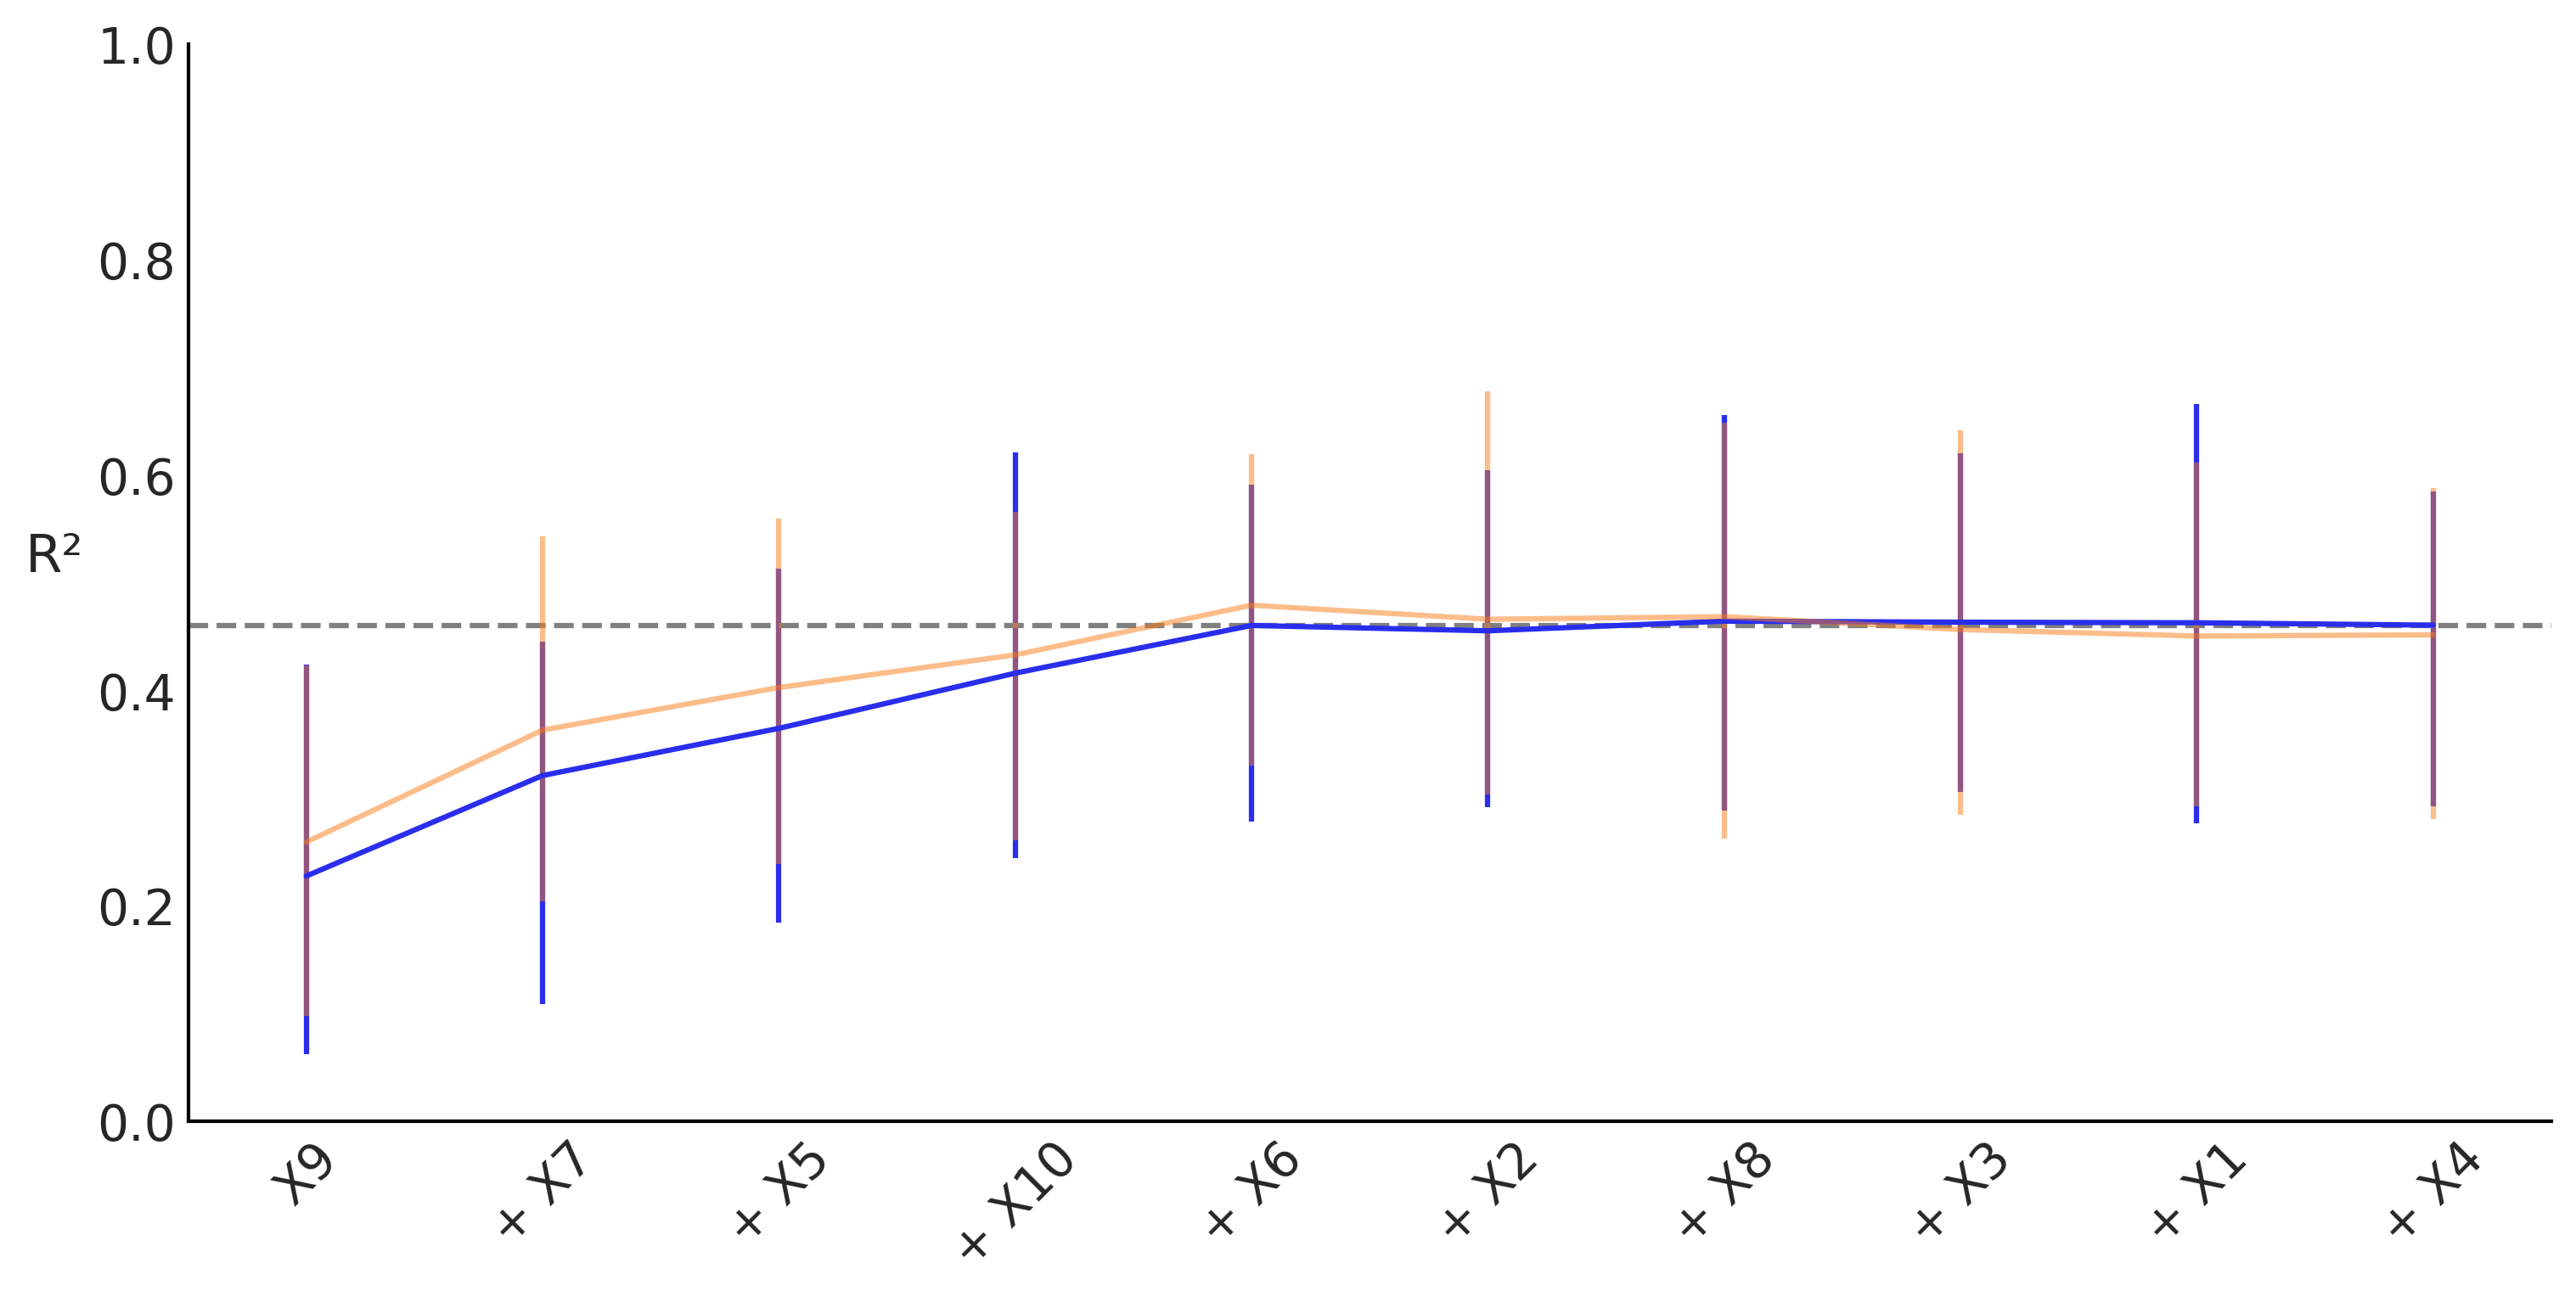

In [15]:
vi_evi(bart_rvs, idatas, X, indices_bw, "backward", 100, RANDOM_SEED, figsize=(10, 5))
plt.savefig("weak-pred_m50_bw.png");

## Explicit computation of R² following method="VI" order, with m=200  

First run to get the ranking of the variable importance with `m=200`.

In [16]:
with pm.Model() as model:
    μ = pmb.BART("μ", X, Y, m=200)
    σ = pm.HalfNormal("σ", 1)
    y = pm.Normal("y", μ, σ, observed=Y)
    idata = pm.sample(
        chains=4, compute_convergence_checks=False, random_seed=RANDOM_SEED
    )

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 289 seconds.


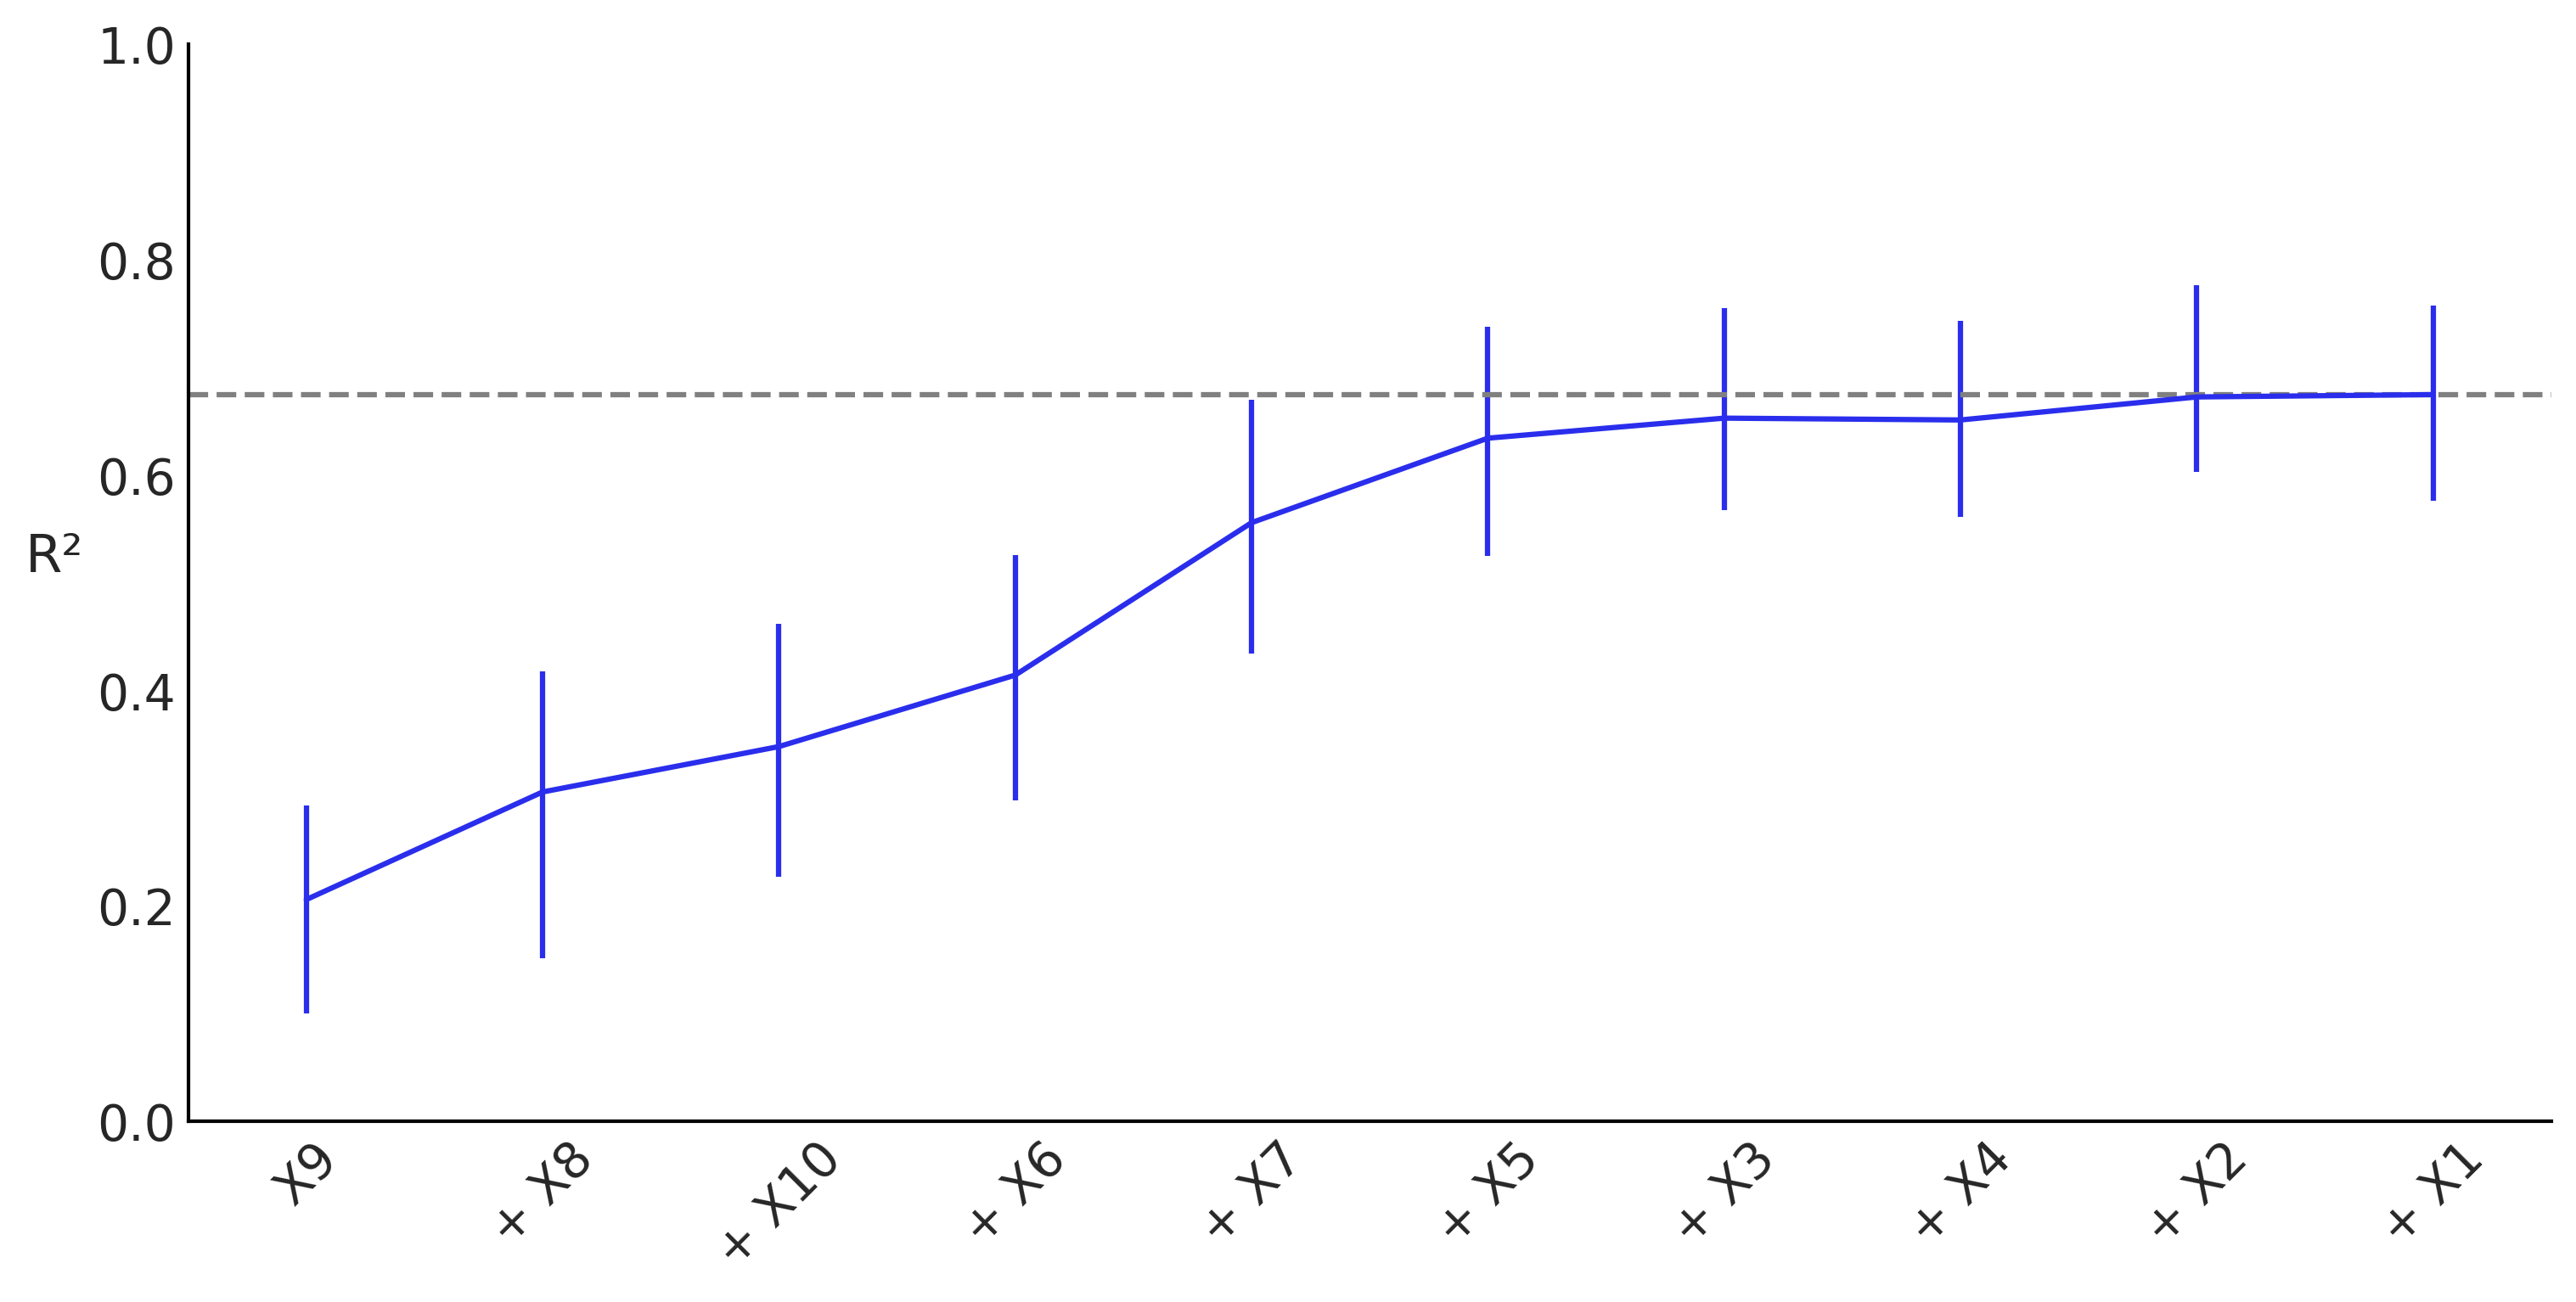

In [17]:
indices_vi_m200, _ = pmb.utils.plot_variable_importance(
    idata, μ, X, method="VI", xlabel_angle=45, figsize=(10, 5)
);

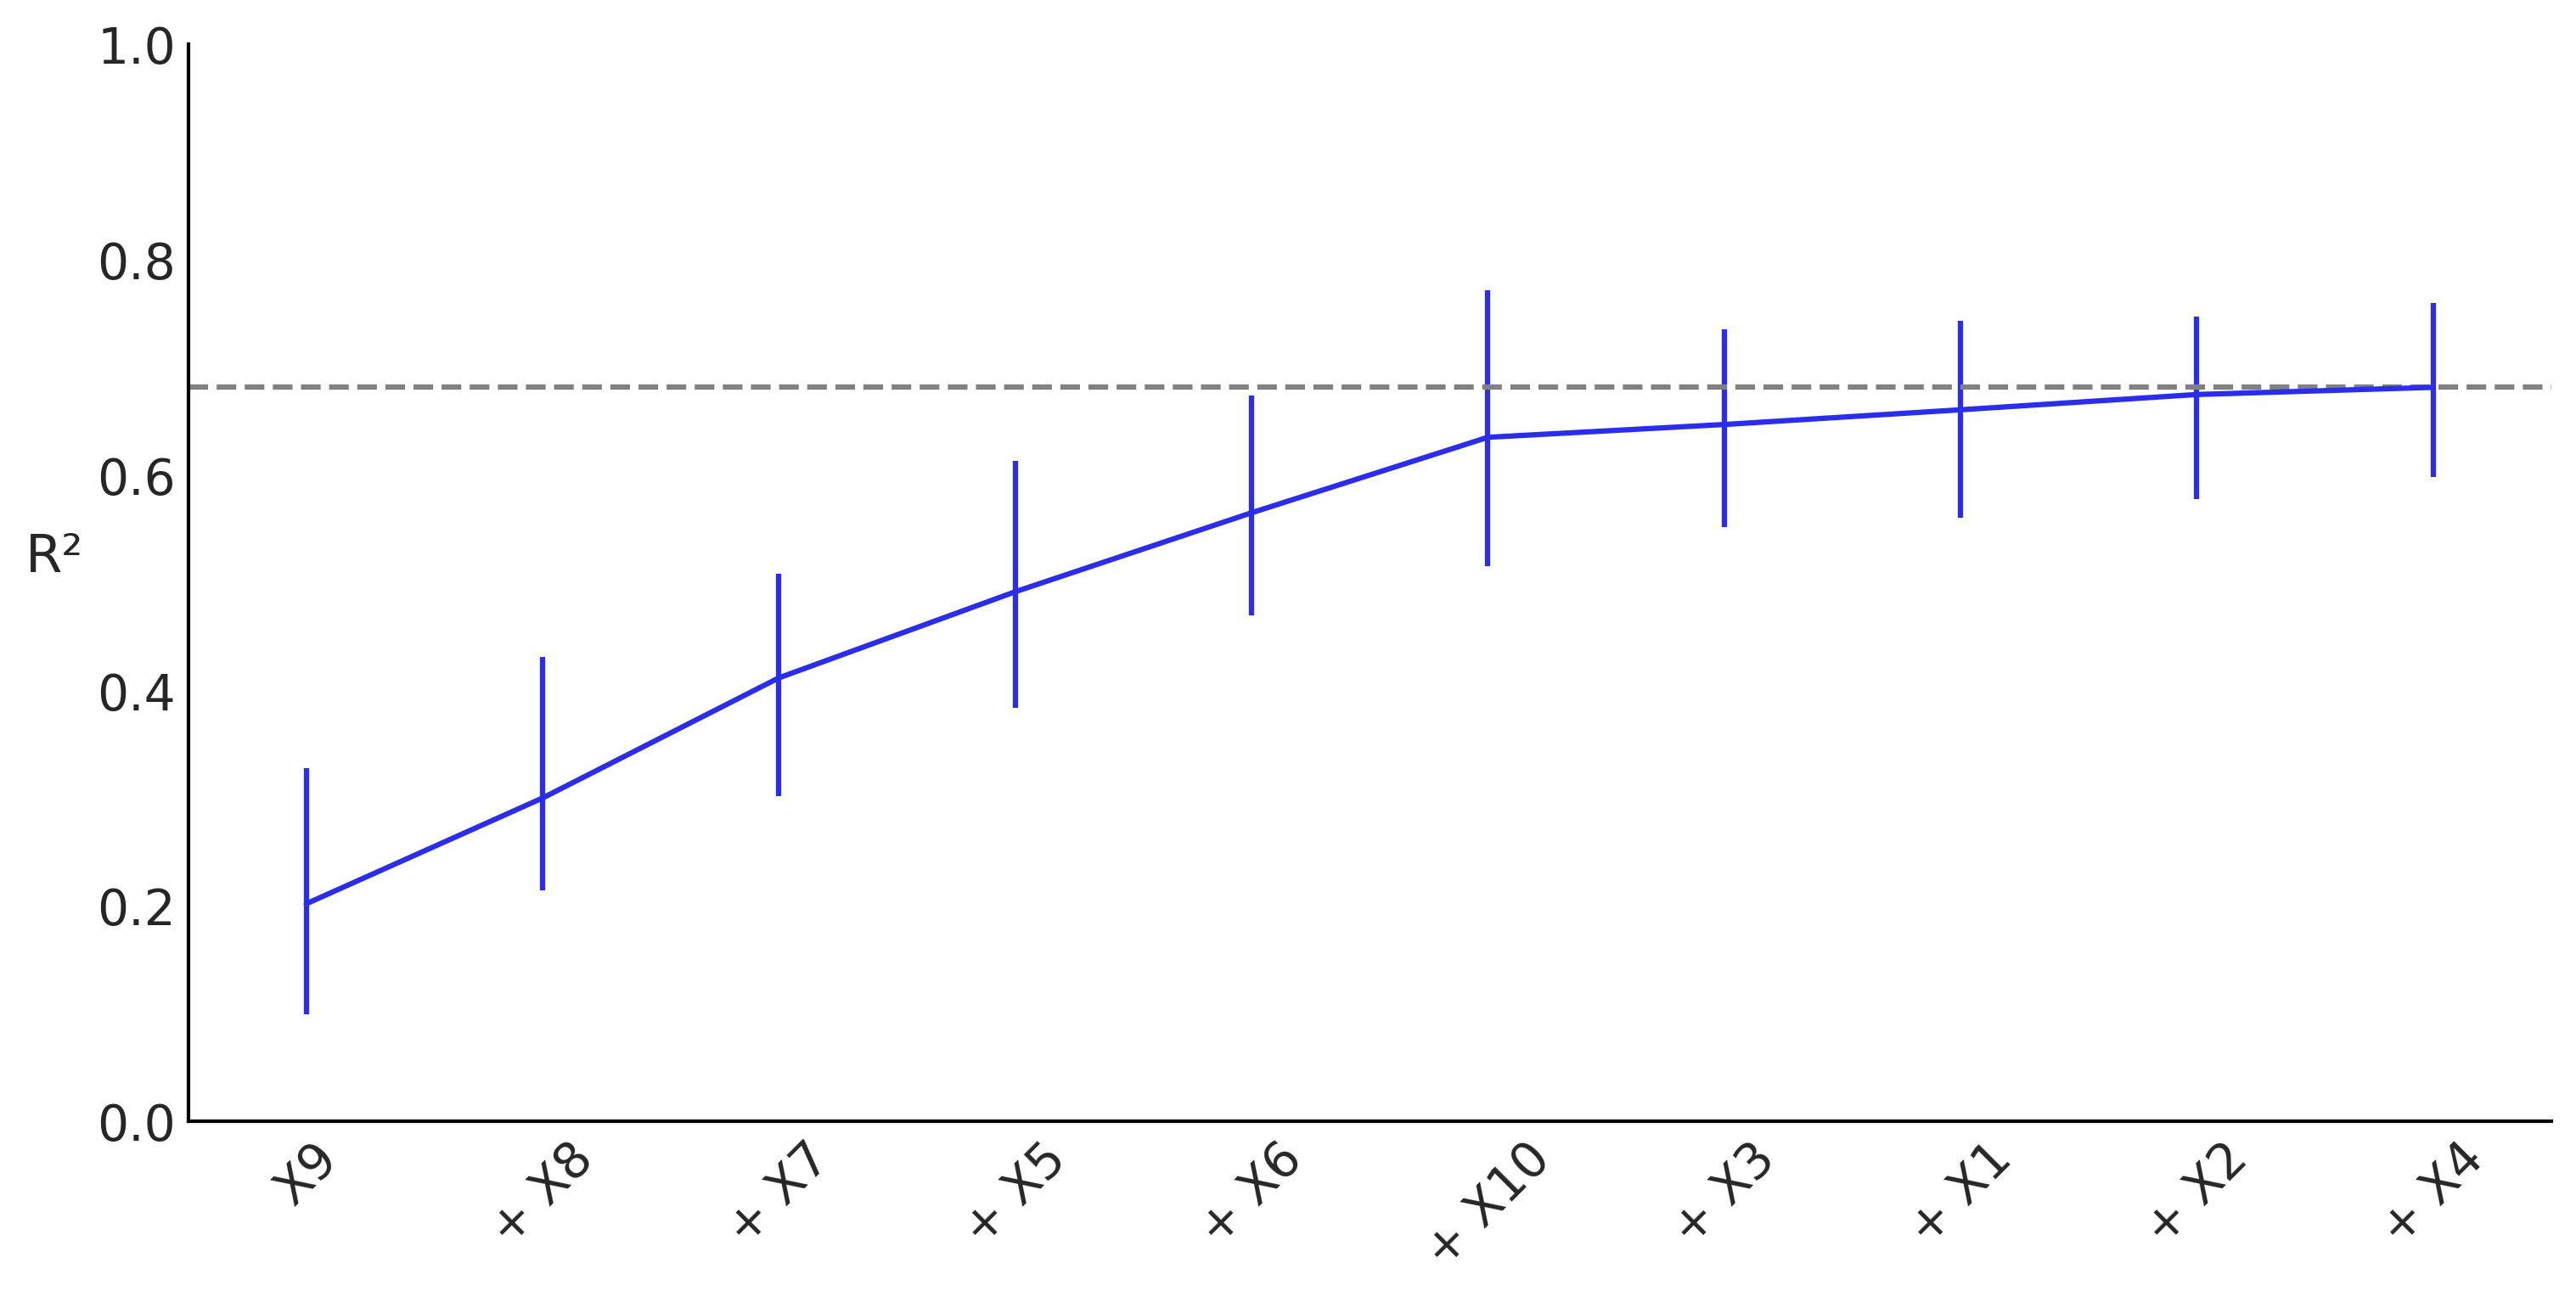

In [18]:
indices_bw_m200, _ = pmb.utils.plot_variable_importance(
    idata, μ, X, method="backward", xlabel_angle=45, figsize=(10, 5)
);

In [19]:
idatas = []
bart_rvs = []

for idx in range(X.shape[1]):
    with pm.Model() as model:
        μ = pmb.BART("μ", X.iloc[:, indices_vi_m200[: idx + 1]], Y, m=200)
        σ = pm.HalfNormal("σ", 1)
        y = pm.Normal("y", μ, σ, observed=Y)
        idata = pm.sample(
            chains=4, compute_convergence_checks=False, random_seed=RANDOM_SEED
        )
        idatas.append(idata)
        bart_rvs.append(μ)

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 289 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 278 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 279 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 280 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 280 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 277 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 278 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 275 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 284 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 287 seconds.


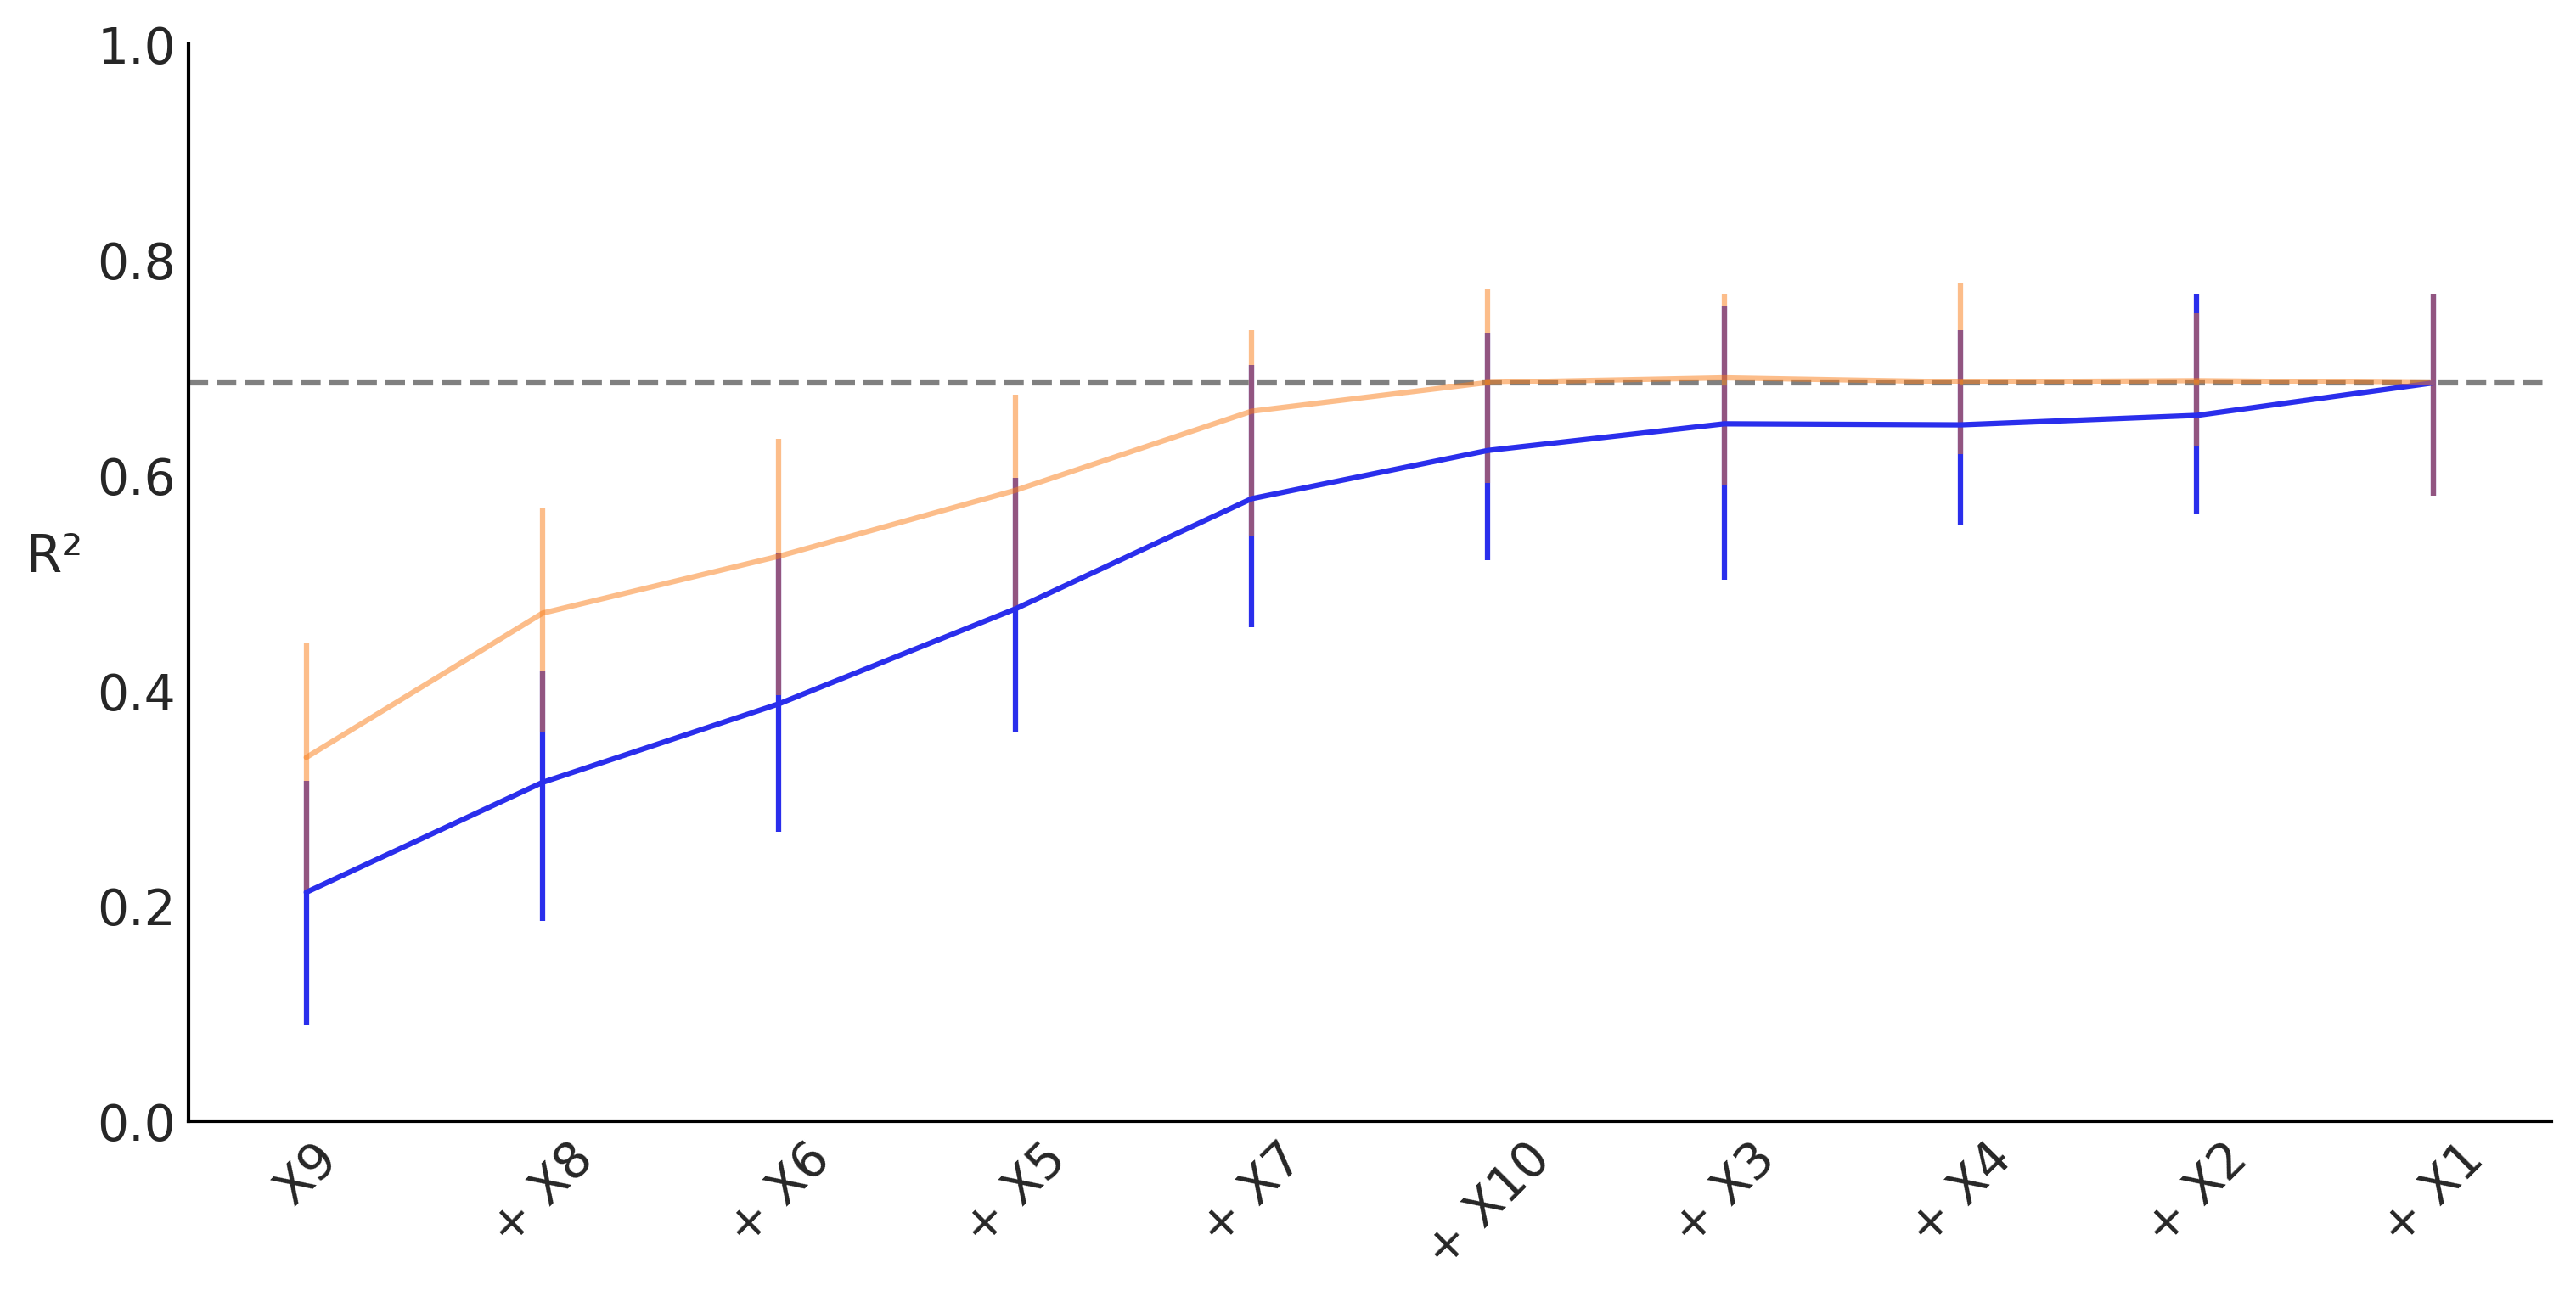

In [20]:
vi_evi(bart_rvs, idatas, X, indices_vi_m200, "VI", 100, RANDOM_SEED, figsize=(10, 5))
plt.savefig("weak-pred_m200_vi.png");

## Explicit computation of R² following method="backward" order, with m=200  

In [21]:
idatas = []
bart_rvs = []

for idx in range(X.shape[1]):
    with pm.Model() as model:
        μ = pmb.BART("μ", X.iloc[:, indices_bw_m200[: idx + 1]], Y, m=200)
        σ = pm.HalfNormal("σ", 1)
        y = pm.Normal("y", μ, σ, observed=Y)
        idata = pm.sample(
            chains=4, compute_convergence_checks=False, random_seed=RANDOM_SEED
        )
        idatas.append(idata)
        bart_rvs.append(μ)

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 295 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 292 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 288 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 282 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 280 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 288 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 289 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 287 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 283 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 276 seconds.


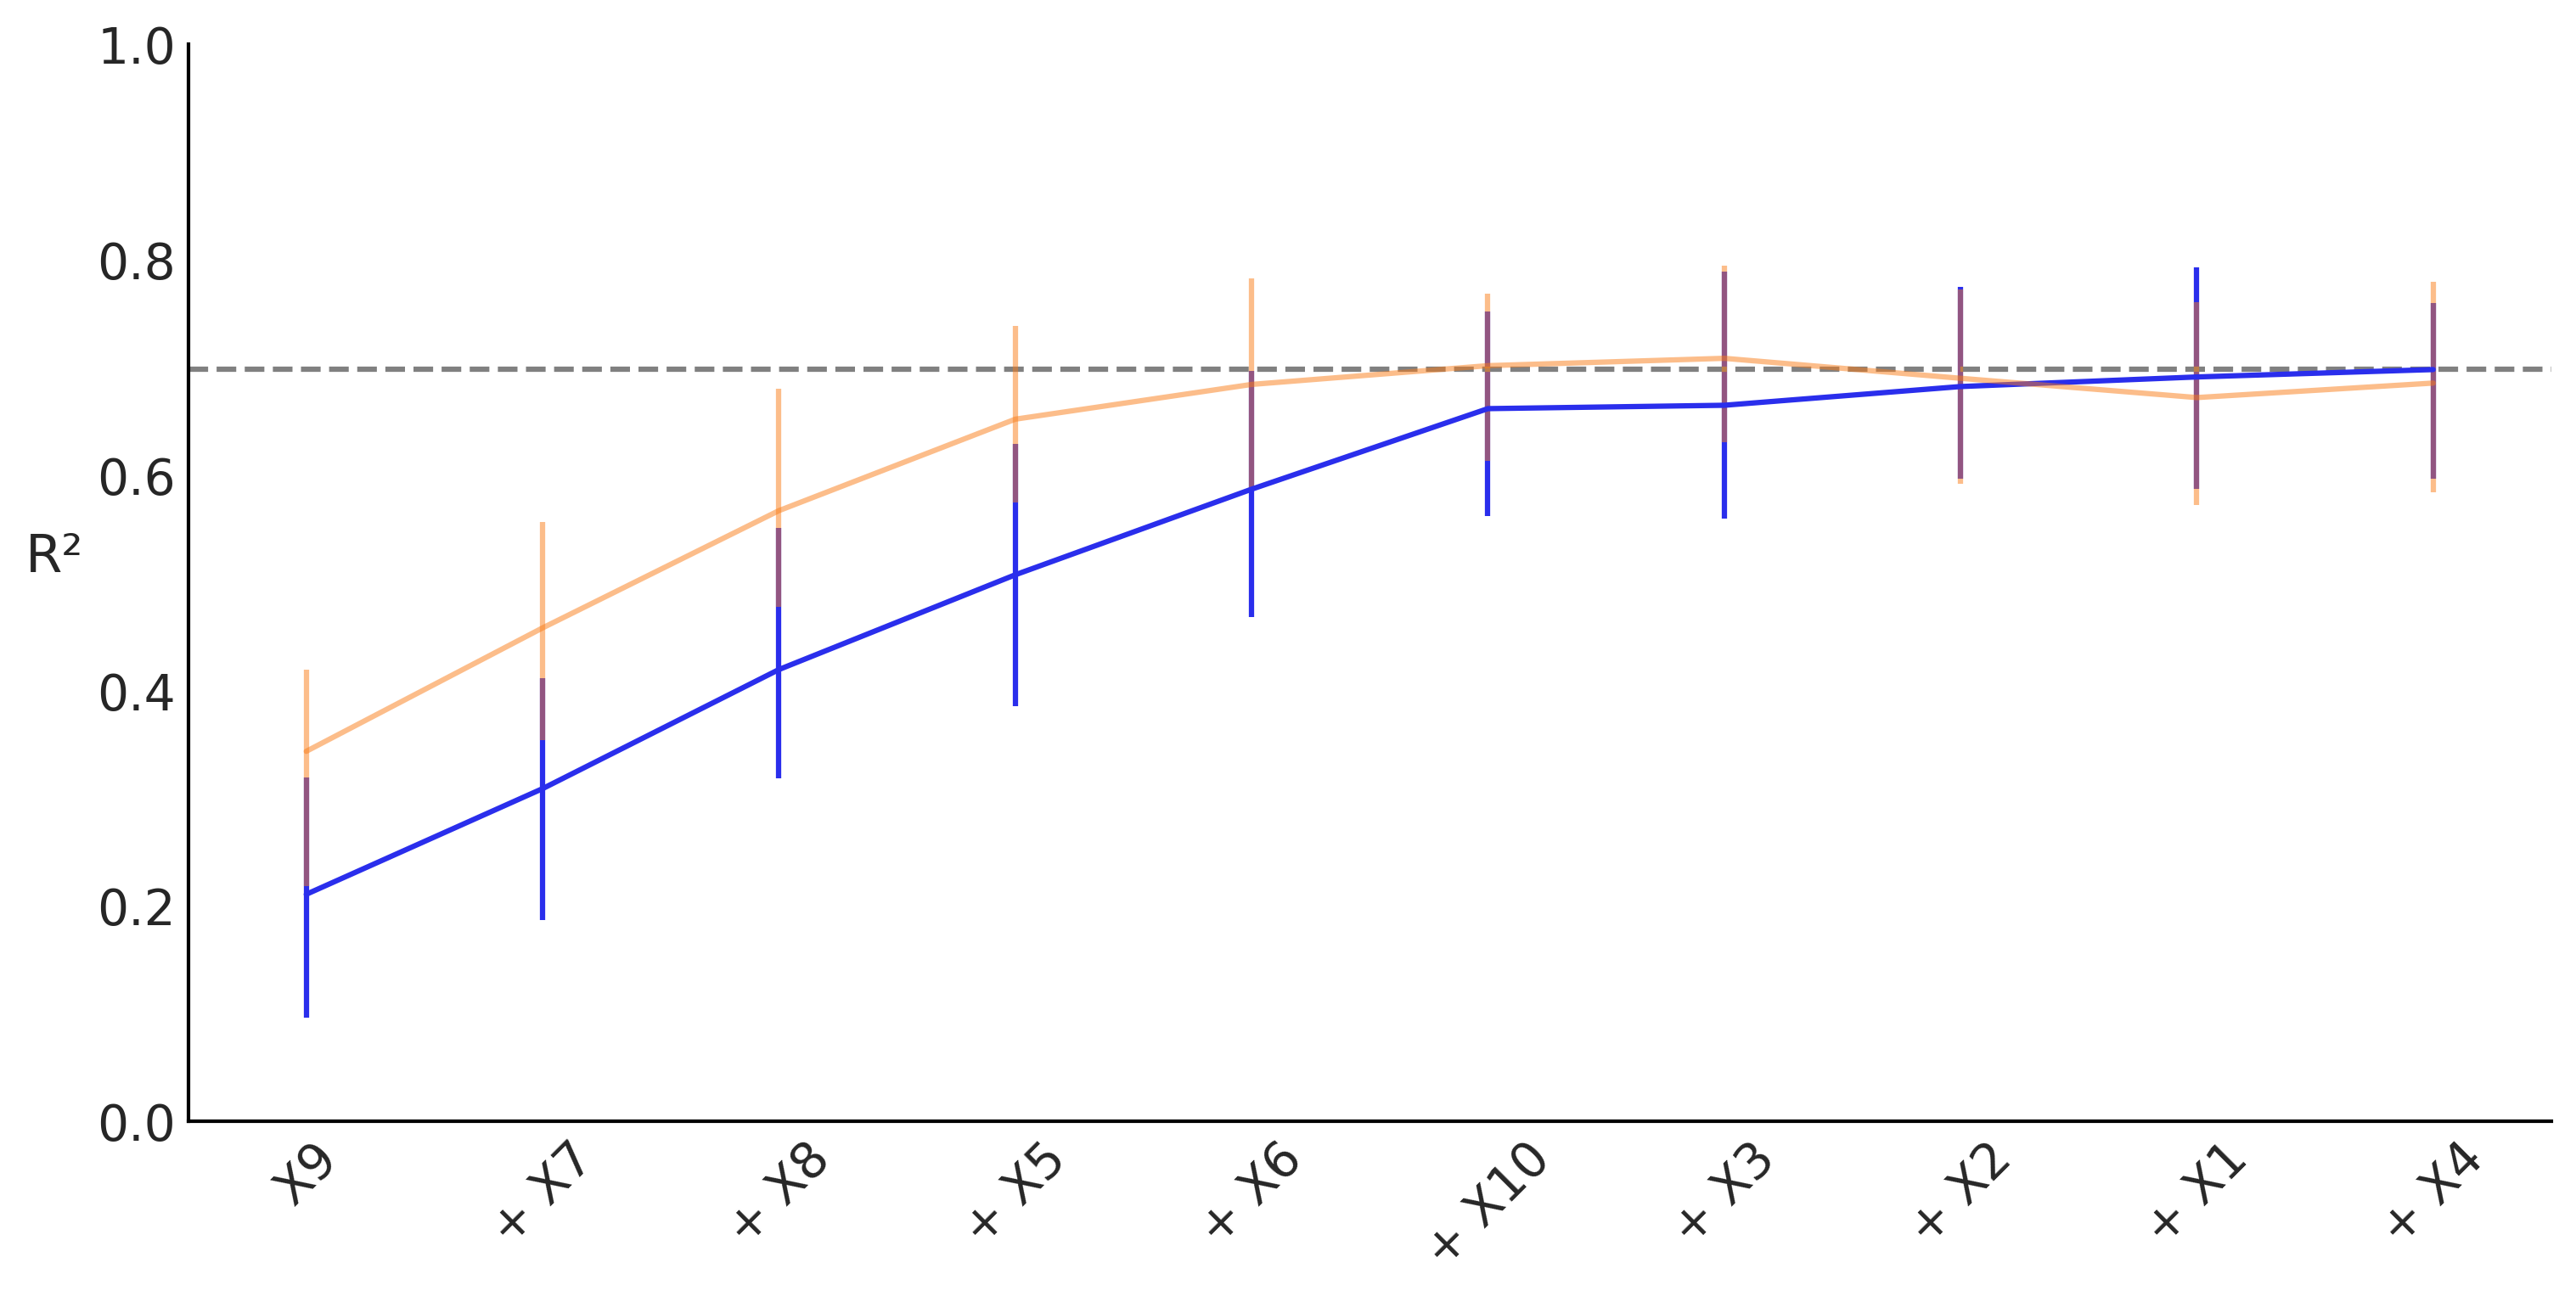

In [22]:
vi_evi(
    bart_rvs, idatas, X, indices_bw_m200, "backward", 100, RANDOM_SEED, figsize=(10, 5)
)
plt.savefig("weak-pred_m200_bw.png")